Давайте познакомимся с приближением ряда скользящим средним на примере биржевых котировок акций компании Uniqlo. В этом разделе модуля мы познакомимся с приближением ряда с помощью скользящего среднего на примере биржевых котировок акций компании Uniqlo.

В качестве дополнительной литературы рекомендуем вам прочесть статью «Скользящие средние. Часть 1 — теория»: https://av-finance.ru/texnicheskij-analiz/skolzyashhie-srednie-chast-1-teoriya.html

Также вам будет интересна статья про использование скользящих средних в трейдинге: https://www.investopedia.com/articles/active-trading/052014/how-use-moving-average-buy-stocks.asp

In [1]:
# импорт библиотек и датасета
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('input/uniqlo.csv')


In [2]:
# посмотрим глазами на начало датасета
# можно увидеть, что данные отсортированы в обратном порядке
# кроме того, данных за некоторые дни нет (например, 2016-12-18)
df.head(15)

,Date,Open,High,Low,Close,Volume,Stock Trading
0,2016-12-30,42120,42330,41700,41830,610000,25628028000
1,2016-12-29,43000,43220,42540,42660,448400,19188227000
2,2016-12-28,43940,43970,43270,43270,339900,14780670000
3,2016-12-27,43140,43700,43140,43620,400100,17427993000
4,2016-12-26,43310,43660,43090,43340,358200,15547803000
5,2016-12-22,43660,43840,43190,43480,381600,16586491000
6,2016-12-21,43900,44370,43610,44000,658900,28994316000
7,2016-12-20,42910,43630,42860,43620,499400,21606102000
8,2016-12-19,42790,43150,42740,43130,358700,15428531000
9,2016-12-16,43350,43550,42810,43130,542000,23380606000


In [0]:
# приведем формата даты к стандарту datetime. 
# это стандартный тип данных, который позволит нам красиво отображать графики по временнЫм осям
# и делать разные операции, например заполнять недостающие данные по дням
df['Date'] = pd.to_datetime(df['Date'], format = '%Y-%m-%d')
df.head(5)


,Date,Open,High,Low,Close,Volume,Stock Trading
0,2016-12-30,42120,42330,41700,41830,610000,25628028000
1,2016-12-29,43000,43220,42540,42660,448400,19188227000
2,2016-12-28,43940,43970,43270,43270,339900,14780670000
3,2016-12-27,43140,43700,43140,43620,400100,17427993000
4,2016-12-26,43310,43660,43090,43340,358200,15547803000


In [0]:
# переименуем индексы строк в даты
df = df.set_index(pd.DatetimeIndex(df['Date']))
# столбец Date нам больше не нужен, удалим его
df.drop(['Date'], axis =1, inplace = True)
df.head(5)

,Open,High,Low,Close,Volume,Stock Trading
Date,,,,,,
2016-12-30,42120,42330,41700,41830,610000,25628028000
2016-12-29,43000,43220,42540,42660,448400,19188227000
2016-12-28,43940,43970,43270,43270,339900,14780670000
2016-12-27,43140,43700,43140,43620,400100,17427993000
2016-12-26,43310,43660,43090,43340,358200,15547803000


In [0]:
# заполним данные по пропущенным дням
# метод resample('d') выполняет группировку данных по дням,
# а ffill заполнит получившиеся пропуски, взяв предыдущее значение вместо пропущенного
df = df.resample('d').ffill()
print(df.isnull().sum()) # проверим, что пропущенных дней больше нет
df.tail(15) # полюбуемся на результат предварительной обработки

Open             0
High             0
Low              0
Close            0
Volume           0
Stock Trading    0
dtype: int64


,Open,High,Low,Close,Volume,Stock Trading
Date,,,,,,
2016-12-16,43350,43550,42810,43130,542000,23380606000
2016-12-17,43350,43550,42810,43130,542000,23380606000
2016-12-18,43350,43550,42810,43130,542000,23380606000
2016-12-19,42790,43150,42740,43130,358700,15428531000
2016-12-20,42910,43630,42860,43620,499400,21606102000
2016-12-21,43900,44370,43610,44000,658900,28994316000
2016-12-22,43660,43840,43190,43480,381600,16586491000
2016-12-23,43660,43840,43190,43480,381600,16586491000
2016-12-24,43660,43840,43190,43480,381600,16586491000


In [0]:
# создадим отдельный Series для цен открытия биржи
OpenPrice = df.Open
OpenPrice.head()

Date
2012-01-04    14050
2012-01-05    13720
2012-01-06    13990
2012-01-07    13990
2012-01-08    13990
Freq: D, Name: Open, dtype: int64

Нарисуем приближение простым скользящим средним с шириной окна 2

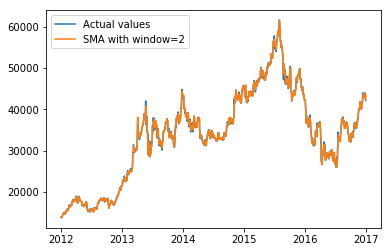

In [0]:
# метод rolling умеет делать скользящие преобразования. 
# Параметр window задает ширину окна, а mean() говорит, что в окне нужно взять среднее арифметическое
result1 = OpenPrice.rolling(window = 2).mean()
# Нарисуем красивый график
plt.plot(OpenPrice,label="Actual values")
plt.plot(result1,label="SMA with window=2")
plt.legend(loc="upper left")
plt.show()

Нарисуем приближение простым скользящим средним с шириной окна 10

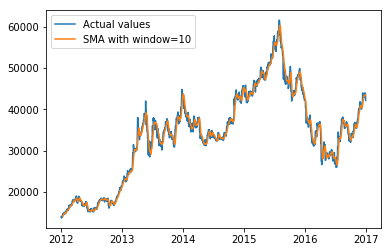

In [0]:
result2 = OpenPrice.rolling(window = 10).mean()
plt.plot(OpenPrice,label="Actual values")
plt.plot(result2,label="SMA with window=10")
plt.legend(loc="upper left")
plt.show()

Нарисуем приближение простым скользящим средним с шириной окна 50.

Можно заметить, что оранжевый график приближения начинается позже графика истинных значений.

Подумайте, почему так получается?

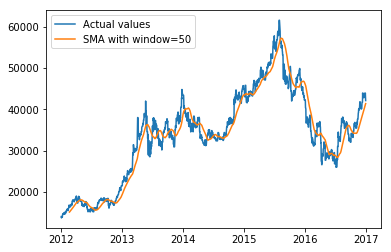

In [0]:
result3 = OpenPrice.rolling(window = 50).mean()
plt.plot(OpenPrice,label="Actual values")
plt.plot(result3,label="SMA with window=50")
plt.legend(loc="upper left")
plt.show()

А теперь OLARPOWER_CUMULDAYBYDAY2. 

В нём содержится информация о производстве энергии солнечными батареями.

→ Агрегируйте данные по неделям.

→ Выполните задания ниже.

In [5]:
df = pd.read_csv('input/solarpower_cumuldaybyday2.csv')
df = df.drop(['Unnamed: 2'], axis=1,)

In [6]:
df

,date,cum_power
0,26/10/2011,0.1
1,27/10/2011,10.2
2,28/10/2011,20.2
3,29/10/2011,29.6
4,30/10/2011,34.2
...,...,...
2553,22/10/2018,28101.0
2554,23/10/2018,28109.0
2555,24/10/2018,28115.0
2556,25/10/2018,28117.0


Постройте ряд еженедельного производства энергии, вычислив приращения полученного недельного ряда. В поле для ответа введите значение произведенной энергии за неделю с 6 по 12 октября 2014, округлив до целых.

In [9]:
# приведем формата даты к стандарту datetime. 
# это стандартный тип данных, который позволит нам красиво отображать графики по временнЫм осям
# и делать разные операции, например заполнять недостающие данные по дням
df['date'] = pd.to_datetime(df['date'], format = '%d/%m/%Y')
df.head(5)


,date,cum_power
0,2011-10-26,0.1
1,2011-10-27,10.2
2,2011-10-28,20.2
3,2011-10-29,29.6
4,2011-10-30,34.2


In [10]:
# переименуем индексы строк в даты
df = df.set_index(pd.DatetimeIndex(df['date']))

# столбец Date нам больше не нужен, удалим его
df.drop(['date'], axis =1, inplace = True)
df.head(5)

,cum_power
date,
2011-10-26,0.1
2011-10-27,10.2
2011-10-28,20.2
2011-10-29,29.6
2011-10-30,34.2


In [22]:
# заполним данные по пропущенным дням
# метод resample('w') выполняет группировку данных по неделям,
# а ffill заполнит получившиеся пропуски, взяв предыдущее значение вместо пропущенного
df = df.resample('w').ffill()
print(df.isnull().sum()) # проверим, что пропущенных дней больше нет
df.head(15) # полюбуемся на результат предварительной обработки

cum_power       0
weekly_power    1
dtype: int64


,cum_power,weekly_power
date,,
2011-10-30,34.2,NaN
2011-11-06,71.8,37.6
2011-11-13,99.9,28.1
2011-11-20,136.5,36.6
2011-11-27,156.1,19.6
2011-12-04,175.3,19.2
2011-12-11,192.6,17.3
2011-12-18,205.4,12.8
2011-12-25,219.7,14.3


In [23]:
# Посчитаем разницу между текущим значением и предыдущим (по неделям)
df['weekly_power'] = df.diff()

In [25]:
# Есть один пропуск - первое значение. Так и быть, заполню его данным из колонки cum_power
df['weekly_power'] = df['weekly_power'].fillna(cum_power)

In [26]:
df.head(15)

,cum_power,weekly_power
date,,
2011-10-30,34.2,34.2
2011-11-06,71.8,37.6
2011-11-13,99.9,28.1
2011-11-20,136.5,36.6
2011-11-27,156.1,19.6
2011-12-04,175.3,19.2
2011-12-11,192.6,17.3
2011-12-18,205.4,12.8
2011-12-25,219.7,14.3


In [27]:
# Постройте ряд еженедельного производства энергии, вычислив приращения полученного недельного ряда.
# В поле для ответа введите значение произведенной энергии за неделю с 6 по 12 октября 2014, округлив до целых.
df.loc[(df.index.year==2014)&(df.index.month==10),['weekly_power']]

,weekly_power
date,
2014-10-05,61.0
2014-10-12,44.0
2014-10-19,49.0
2014-10-26,33.0


Постройте ряд скользящего среднего для размера окна 4. Сколько элементов в ряде скользящего среднего?

Нарисуем приближение простым скользящим средним с шириной окна 6

In [33]:
# создадим отдельный Series для выработки энергии
weekly_power = df.weekly_power
weekly_power.head()

date
2011-10-30    34.2
2011-11-06    37.6
2011-11-13    28.1
2011-11-20    36.6
2011-11-27    19.6
Freq: W-SUN, Name: weekly_power, dtype: float64

In [29]:
df['moving_av'] = df['weekly_power'].rolling(window=4).mean()

In [31]:
moving_av = df.weekly_power.rolling(window=4).mean()

In [30]:
df['moving_av']

date
2011-10-30       NaN
2011-11-06       NaN
2011-11-13       NaN
2011-11-20    34.125
2011-11-27    30.475
               ...  
2018-09-30    95.250
2018-10-07    90.500
2018-10-14    87.250
2018-10-21    74.500
2018-10-28    58.500
Freq: W-SUN, Name: moving_av, Length: 366, dtype: float64

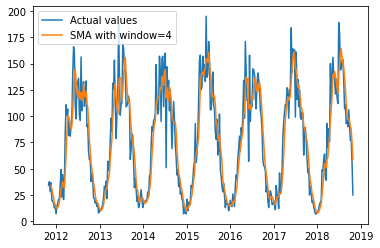

In [34]:
# Нарисуем красивый график
plt.plot(weekly_power,label="Actual values") # тут у нас оригинальный ряд
plt.plot(moving_av,label="SMA with window=4") # тут прогнозный
plt.legend(loc="upper left")
plt.show()

In [36]:
df.iloc[119]

cum_power       8132.0
weekly_power      28.0
moving_av         21.5
Name: 2014-02-09 00:00:00, dtype: float64

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 366 entries, 2011-10-30 to 2018-10-28
Freq: W-SUN
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cum_power     366 non-null    float64
 1   weekly_power  366 non-null    float64
 2   moving_av     363 non-null    float64
dtypes: float64(3)
memory usage: 11.4 KB
